In [1]:
# !pip install yfinance

In [2]:
from pathlib import Path
import sys
PATH=Path("/content/drive/MyDrive/trading_strategy_learner")
sys.path.insert(0, str(Path(PATH)))
print(sys.path)
%cd "/content/drive/MyDrive/trading_strategy_learner"

['/content/drive/MyDrive/trading_strategy_learner', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']
/content/drive/MyDrive/trading_strategy_learner


In [3]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import marketsimulator as mks
import ManualTrader as mt
import ClassificationTrader as ct

### Training

In [10]:
stock_symbol = "jpm"
starting_values = 100000
max_shares_per_trade = 1000
commission = 0
impact = 0
n_days = 10

In [11]:
train_start = "2014-01-01"
train_end = "2017-12-31"

clf = ct.ClassificationTrader(impact=0.0, commission=0.0, n_days=n_days)  # Constructor
clf.train(stock_symbol, train_start, train_end)
clf_trades = clf.test(stock_symbol, train_start, train_end, max_shares_per_trade)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# Portfolio values dataframe
portval_df = pd.DataFrame(index=pd.date_range(clf_trades.index.min(), clf_trades.index.max()))
portval_df.index.name = "Date"

# Compute portfolio values of classification trader prediction
portval_df['Classification Trader'] = mks.compute_portvals(clf_trades, 
                                                           stock_symbol, 
                                                           starting_values,
                                                           commission, 
                                                           impact)

# Benchmark Portfolio
bch_trades = mks.get_benchmark(stock_symbol, train_start, train_end, max_shares_per_trade)
portval_df['Benchmark'] = mks.compute_portvals(bch_trades,
                                               stock_symbol, 
                                               starting_values,
                                               commission, 
                                               impact)
# Deal with missing values and normalized the values
portval_df = portval_df.fillna(method="ffill").fillna(method="bfill")
normed_portVal = portval_df / portval_df.loc[portval_df.index.min()]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


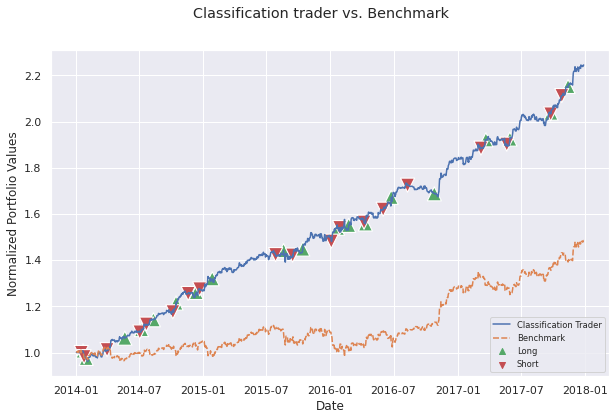

In [13]:
title= "Classification trader vs. Benchmark"

fig = mks.plot_portvals(normed_portVal, clf_trades, title)
fig.show()

### Test

In [14]:
test_start = "2018-01-01"
test_end = "2019-12-31"

clf_trades = clf.test(symbol=stock_symbol, sd=test_start, ed=test_end, max_shares=max_shares_per_trade)

[*********************100%***********************]  1 of 1 completed


### Visualize results

In [15]:
# Portfolio values dataframe
portval_df = pd.DataFrame(index=pd.date_range(clf_trades.index.min(), clf_trades.index.max()))
portval_df.index.name = "Date"

# Compute portfolio values of classification trader prediction
portval_df['Classification Trader'] = mks.compute_portvals(clf_trades, 
                                                           stock_symbol, 
                                                           starting_values,
                                                           commission, 
                                                           impact)

# Benchmark Portfolio
bch_trades = mks.get_benchmark(stock_symbol, test_start, test_end, max_shares_per_trade)
portval_df['Benchmark'] = mks.compute_portvals(bch_trades,
                                               stock_symbol, 
                                               starting_values,
                                               commission, 
                                               impact)

# Deal with missing values and normalized the values
portval_df = portval_df.fillna(method="ffill").fillna(method="bfill")
normed_portVal = portval_df / portval_df.loc[portval_df.index.min()]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


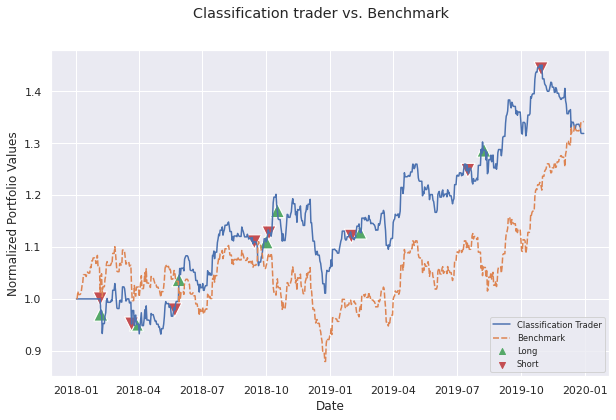

In [17]:
title= "Classification trader vs. Benchmark"

fig = mks.plot_portvals(normed_portVal, clf_trades, title)
fig.show()